[View in Colaboratory](https://colab.research.google.com/github/sungreong/TIL/blob/master/(%EC%88%98%EC%A0%95%EB%B3%B8)Nonparametric_Regression_Homework4.ipynb)

In [109]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [110]:
cd ./gdrive/My Drive/대학원수업/비모수회귀분석(함수추정)

/content/gdrive/My Drive/대학원수업/비모수회귀분석(함수추정)


# 틀린게 있을 수도 있으니 주의바람.
# FeedBack 주시면 감사하겠습니다.

# 1 .
## The data are the infant-mortality rates (infant death per 1000 live births)
## and GDP per capita (in U.S. dollars) for 193 countries in 2003 . 

* Make a scatter plot of the data
* Estimate the regression function with different approaches.
  Give your comments

In [111]:
import statsmodels.nonparametric.api as nparam
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/jgscott/learnR/master/infmort/infmort.csv")
data2 = data.dropna()
data2.head()

,country,mortality,gdp
0,Afghanistan,154.0,2848.0
1,Albania,32.0,863.0
2,Algeria,44.0,1531.0
5,Angola,124.0,355.0
6,Antigua,24.0,6966.0


In [0]:
from math import ceil
import numpy as np
from scipy import linalg


def lowess2(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(np.ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

"""
아직 문제가 있음 H 가 BANDWIDHT 역활을 못하는 중 
"""
def NWE(X = None ,Y = None , h = None , leave = False ) : 
    matrix = norm.pdf( (X[:, None] - X[None, :]) / h  , loc = 0 ,scale = 1) / h
    if leave == True :
        np.fill_diagonal( matrix , 0 )
    else :
        pass 
    denominator = np.sum( matrix , axis =  1 )
    numerator = np.sum( matrix * Y , axis = 1 )
    m_hat = numerator/denominator
    dataframe = np.concatenate([X[:, np.newaxis ], m_hat[: , np.newaxis ]] , axis = 1 )
    pred = pd.DataFrame( dataframe , columns = ["x", "nw"]).sort_values(by = ["x"])
    return pred


    
def loc_avg(X = None , Y = None , h = None , leave = False ) :
    matrix = (X[:, None] - X[None, :]) / h 
    index = (matrix >= - 1.0 ) & (matrix <= 1.0 ) 
    matrix[index] = 1
    matrix[~index] = 0
    if leave == True :
        np.fill_diagonal( matrix , 0 )
    else :
        pass 
    
    denominator = np.sum(matrix , axis =  1 )
    numerator = np.sum(matrix * Y , axis = 1 )
    m_hat = numerator/denominator
    dataframe = np.concatenate([X[:, np.newaxis ], m_hat[: , np.newaxis ]] , axis = 1 )
    pred = pd.DataFrame( dataframe , columns = ["x", "local"]).sort_values(by = ["x"])
    return pred



def CV(X = None , Y= None , h=None ) : 
    matrix = norm.pdf( (X[:, None] - X[None, :]) / h  , loc = 0 ,scale = 1 ) / h 
    ## 자기자신을 없앤다는 의미는 곧 자기자신을 0으로 만들면 되지 않을까 싶어서 이렇게 진행함
    np.fill_diagonal( matrix , 0 )
    denominator = np.sum(matrix , axis =  1 )
    numerator = np.sum(matrix * Y , axis = 1 )
    m_hat = numerator/denominator
    dataframe = np.concatenate([X[:, np.newaxis ], m_hat[: , np.newaxis ] ,  Y[: , np.newaxis] ], axis = 1 )
    pred = pd.DataFrame( dataframe , columns = ["x", "nw" , "true_y"]).sort_values(by = ["x"])
    AMSE = np.mean( np.square( pred.true_y.values - pred.nw.values ) )
    return AMSE

def BASIC_CV(X = None , Y= None , h=None , method = None ) : 
    matrix = norm.pdf( (X[:, None] - X[None, :]) / h  , loc= 0 , scale = 1 ) / h
    denominator = np.sum(matrix , axis =  1 )
    numerator = np.sum(matrix * Y , axis = 1 )
    m_hat = numerator/denominator
    dataframe = np.concatenate([X[:, np.newaxis ], m_hat[: , np.newaxis ] , Y[: , np.newaxis] ] , axis = 1 )
    pred = pd.DataFrame( dataframe , columns = ["x", "nw" , "true_y"]).sort_values(by = ["x"])
    AMSE = np.mean( np.square( pred.true_y.values - pred.nw.values ) )
    if method == "local_avg" :
        output = loc_avg(X , Y , h )
        dataframe = np.concatenate([X[:, np.newaxis ] , Y[: , np.newaxis] ], axis = 1 )
        real = pd.DataFrame( dataframe , columns = ["x" , "true_y"]).sort_values(by = ["x"])
        pred = pd.concat([output , real.true_y ] , axis = 1 )
        AMSE = np.mean( np.square( pred.true_y.values - pred.local.values ) )
    elif method == "nw" :
        output = NWE(X , Y , h )
        dataframe = np.concatenate([X[:, np.newaxis ] , Y[: , np.newaxis] ], axis = 1 )
        real = pd.DataFrame( dataframe , columns = ["x" , "true_y"]).sort_values(by = ["x"])
        pred = pd.concat([output , real.true_y ] , axis = 1 )
        AMSE = np.mean( np.square( pred.true_y.values - pred.nw.values ) )
    return AMSE


## Method 
*  local_avg 
* nw 

In [0]:
def CV(X = None , Y= None , h=None , method = None , leave = True ) : 
    if method == "local_avg" :
        output = loc_avg(X , Y , h , leave )
        dataframe = np.concatenate([X[:, np.newaxis ] , Y[: , np.newaxis] ], axis = 1 )
        real = pd.DataFrame( dataframe , columns = ["x" , "true_y"]).sort_values(by = ["x"])
        pred = pd.concat([output , real.true_y ] , axis = 1 ).dropna()
        AMSE = np.mean( np.square( pred.true_y.values - pred.local.values ) )
    elif method == "nw" :
        output = NWE(X , Y , h  , leave )
        dataframe = np.concatenate([X[:, np.newaxis ] , Y[: , np.newaxis] ], axis = 1 )
        real = pd.DataFrame( dataframe , columns = ["x" , "true_y"]).sort_values(by = ["x"])
        pred = pd.concat([output , real.true_y ] , axis = 1 )
        AMSE = np.mean( np.square( pred.true_y.values - pred.nw.values ) )
    return AMSE



def BASIC_CV(X = None , Y= None , h=None , method = None ) : 
    if method == "local_avg" :
        output = loc_avg(X , Y , h )
        dataframe = np.concatenate([X[:, np.newaxis ] , Y[: , np.newaxis] ], axis = 1 )
        real = pd.DataFrame( dataframe , columns = ["x" , "true_y"]).sort_values(by = ["x"])
        pred = pd.concat([output , real.true_y ] , axis = 1 )
        AMSE = np.mean( np.square( pred.true_y.values - pred.local.values ) )
    elif method == "nw" :
        output = NWE(X , Y , h )
        dataframe = np.concatenate([X[:, np.newaxis ] , Y[: , np.newaxis] ], axis = 1 )
        real = pd.DataFrame( dataframe , columns = ["x" , "true_y"]).sort_values(by = ["x"])
        pred = pd.concat([output , real.true_y ] , axis = 1 )
        AMSE = np.mean( np.square( pred.true_y.values - pred.nw.values ) )
    return AMSE




# statsmodels.nonparametric.lowess
* frac : y 값을 평가할 때 데이터 사용 비율
* it : 잔차기반으로 다시 가중치를 주는 수

# Robust Locally Weighted Regression [link](https://pdfs.semanticscholar.org/414e/5d1f5a75e2327d99b5bbb93f2e4e241c5acc.pdf)

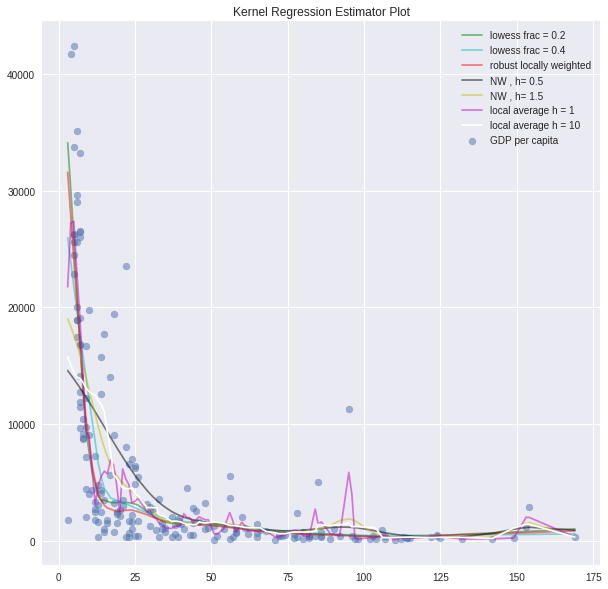

In [114]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
from scipy.stats import norm
if __name__ == '__main__':
    import math
    
    x = data2.mortality.values
    y = data2.gdp.values
    
    lowess_stat = lowess(y,x,frac=0.2,it=1)
    lowess_x = list(zip(*lowess_stat))[0]
    lowess_y = list(zip(*lowess_stat))[1]

    lowess_stat = lowess(y,x,frac=0.4,it=1)
    lowess_x1 = list(zip(*lowess_stat))[0]
    lowess_y1 = list(zip(*lowess_stat))[1]

    #f = interp1d(lowess_x, lowess_y, bounds_error=False)
    
    local  = loc_avg(X = x , Y = y ,  h = 1 ) 
    local1  = loc_avg(X = x , Y = y ,  h = 10 ) 


    
    f = 0.25
    yest = lowess2(x, y, f=f, iter=3)
    dataframe = np.concatenate([x[:, np.newaxis ], yest[: , np.newaxis ]] , axis = 1 )
    pred = pd.DataFrame( dataframe, columns = ["x", "yest"]).sort_values(by = ["x"])
    
    
    NW = NWE(X = x , Y = y , h = 10 )
    NW1 = NWE(X = x , Y = y , h = 5 )
    plt.figure(figsize=(10,10))
    plt.scatter(x, y, label='GDP per capita' , alpha = 0.5)
    plt.plot(lowess_x,lowess_y,'g-', label = "lowess frac = 0.2" , alpha =0.5);
    plt.plot(lowess_x1,lowess_y1,'c-', label = "lowess frac = 0.4" , alpha =0.5);
    plt.plot(pred.x , pred.yest ,"r-" , label = "robust locally weighted" , alpha =0.5)
    plt.plot(NW.x , NW.nw ,"k-" ,label ="NW , h= 0.5 " , alpha = 0.5)
    plt.plot(NW1.x , NW1.nw ,"y-" ,label ="NW , h= 1.5 " , alpha = 0.5)
    plt.plot(local.x ,local.local ,'m-', label = "local average h = 1 " , alpha =0.5);
    plt.plot(local1.x ,local1.local ,'w-', label = "local average h = 10 " , alpha = 1 );

    plt.title("Kernel Regression Estimator Plot")
    plt.legend()
    plt.show()

    


In [115]:


x = data2.mortality.values
y = data2.gdp.values
h = 0.5
matrix = norm.pdf( (x[:, None] - x[None, :]) / h  , loc = 0 ,scale = 1) / h
denominator = np.sum( matrix , axis =  1 )
numerator = np.sum(matrix * y , axis = 1 )
m_hat = numerator/denominator    


np.sum( matrix[:, 0]*y / denominator[0] )
print(y[0])
print(np.sum( matrix[:, 0]*y / denominator[0] ))
print(y[0] - m_hat[0])
y[0] - np.sum( matrix[:, 0]*y / denominator[0] )

"""
차이가 없는 것을 확인했다 왜 다른지 모르겠음 
"""


model = nparam.KernelReg(endog=[y],
                          exog=[x], 
                         var_type='c', bw='cv_ls')


model.fit()
print(model.bw)

2848.0
2642.494162433869
205.5058375661306
[5.46858116]


#  Local_avg Optimal H

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


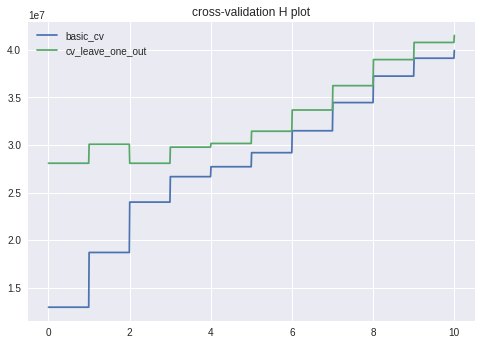

basci_cv  / optimal h = 1e-07  loss = 12930974.176764125  
cv_leave_one_out / optimal h = 2.0020020819819817  loss = 28079650.5081031  
[5.46858116]


In [116]:
x = data2.mortality.values
y = data2.gdp.values
    
method2 = "local_avg"
grid_h = np.linspace(0.0000001 , 10 , 1000)
save = []
save2 = []
for i in grid_h :
    save.append(CV(X= x , Y = y , h = i , method =method2))
    save2.append(BASIC_CV(X= x , Y = y , h = i , method =method2))
plt.plot( grid_h , save2 , label ="basic_cv")
plt.plot( grid_h , save , label ="cv_leave_one_out")
plt.title( "LOCAL AVG cross-validation H plot" , fontsize = 20 )
plt.legend()
plt.show()


save2_index = np.where(save2  ==  np.min(save2))[0]
print("basci_cv  / optimal h = {}  loss = {}  ".format( grid_h[save2_index][0] , np.min(save2)) )

save=np.asarray(save)
save = save[np.isfinite(save)]

save_index = np.where(save  ==  np.min(save))[0]
print("cv_leave_one_out / optimal h = {}  loss = {}  ".format( grid_h[save_index][0] , np.min(save)) )
model = nparam.KernelReg(endog=[y],
                          exog=[x], 
                         var_type='c', bw='cv_ls')


model.fit()
print(model.bw)
model_bw = model.bw
## basci_cv h = 0.12012022
## cv_leave_One_out = 0.83083
## statmodels (least-squares cross-validation) : 5.4

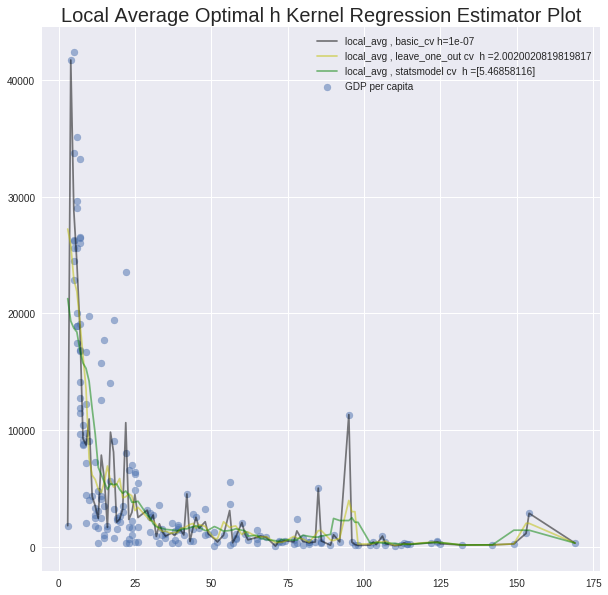

In [118]:
if __name__ == '__main__':
    import math
    
    x = data2.mortality.values
    y = data2.gdp.values
        
    
    local1 = loc_avg(X = x , Y = y , h = grid_h[save2_index][0] )
    local2 = loc_avg(X = x , Y = y , h = grid_h[save_index][0] )
    local3 = loc_avg(X = x , Y = y , h = model_bw )
    
    plt.figure(figsize=(10,10))
    plt.scatter(x, y, label='GDP per capita' , alpha = 0.5)
    plt.plot(local1.x , local1.local ,"k-" ,label ="local_avg , basic_cv h={}".format(grid_h[save2_index][0]) , alpha = 0.5)
    plt.plot(local2.x , local2.local ,"y-" ,label ="local_avg , leave_one_out cv  h ={}".format(grid_h[save_index][0]) , alpha = 0.5)
    plt.plot(local3.x , local3.local ,"g-" ,label ="local_avg , statsmodel cv  h ={}".format(model_bw) , alpha = 0.5)
    plt.title("Local Average Optimal h Kernel Regression Estimator Plot" , fontsize = 20 )
    plt.legend()
    plt.show()



## Method : Nadaraya wastion  CV(h)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


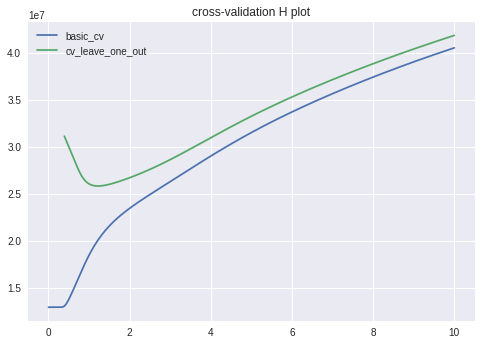

basci_cv  / optimal h = [0.12012022]  loss = 12930974.176764123  
cv_leave_one_out / optimal h = [0.83083092]  loss = 25814688.05243164  
[5.46858116]


In [119]:
x = data2.mortality.values
y = data2.gdp.values
    
method2 = "nw"
grid_h = np.linspace(0.0000001 , 10 , 1000)
save = []
save2 = []
for i in grid_h :
    save.append(CV(X= x , Y = y , h = i , method =method2))
    save2.append(BASIC_CV(X= x , Y = y , h = i , method =method2))
plt.plot( grid_h , save2 , label ="basic_cv")
plt.plot( grid_h , save , label ="cv_leave_one_out")
plt.title( "cross-validation H plot" )
plt.legend()
plt.show()


save2_index = np.where(save2  ==  np.min(save2))
print("basci_cv  / optimal h = {}  loss = {}  ".format( grid_h[save2_index] , np.min(save2)) )

save=np.asarray(save)
save = save[np.isfinite(save)]

save_index = np.where(save  ==  np.min(save))
print("cv_leave_one_out / optimal h = {}  loss = {}  ".format( grid_h[save_index] , np.min(save)) )
model = nparam.KernelReg(endog=[y],
                          exog=[x], 
                         var_type='c', bw='cv_ls')


model.fit()
print(model.bw)
model_bw = model.bw
## basci_cv h = 0.12012022
## cv_leave_One_out = 0.83083
## statmodels (least-squares cross-validation) : 5.4

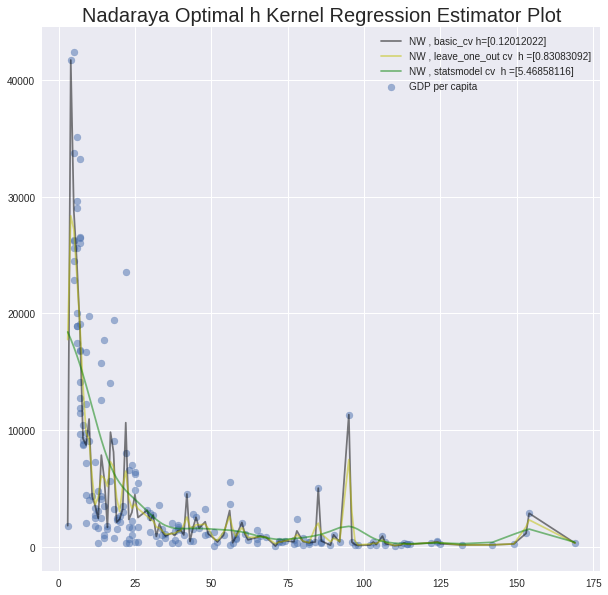

In [120]:
if __name__ == '__main__':
    import math
    
    x = data2.mortality.values
    y = data2.gdp.values
        
    
    NW = NWE(X = x , Y = y , h = grid_h[save2_index] )
    NW1 = NWE(X = x , Y = y , h = grid_h[save_index] )
    NW2 = NWE(X = x , Y = y , h = model_bw )
    
    plt.figure(figsize=(10,10))
    plt.scatter(x, y, label='GDP per capita' , alpha = 0.5)
    plt.plot(NW.x , NW.nw ,"k-" ,label ="NW , basic_cv h={}".format(grid_h[save2_index]) , alpha = 0.5)
    plt.plot(NW1.x , NW1.nw ,"y-" ,label ="NW , leave_one_out cv  h ={}".format(grid_h[save_index]) , alpha = 0.5)
    plt.plot(NW2.x , NW2.nw ,"g-" ,label ="NW , statsmodel cv  h ={}".format(model_bw) , alpha = 0.5)
    plt.title("Nadaraya Optimal h Kernel Regression Estimator Plot" , fontsize= 20 )
    plt.legend()
    plt.show()



## Comment
* nadaraya wastion 이 local weight average 보다 좀 더 outlier 에 민감하게 작용하는 것 같다. 
* lowess 은 smooth 하게 선이그어지려하지만 nw 은 h 에 따라서 데이터에 더 민감하게 반응한다.
* lowess 에서 데이터를 어디까지 볼껀지에 따라 그림이 달라지는데 좀 더 많은 데이터를 보게 할수록 완만해지는 경향이 있다.

# [CMD DATA] Consider power as response variable and Multiple as covariate

* Fit a Model based the first 400 observations :
   Make a Scatter plot of the data.
   
   Consider Nadaraya-Waston estimator.
   
   Using CV(h) score to choose to h.
   
   Present your estimate
   
* Repeat the procedure above , but fot the whole data set.

In [0]:
h = 0.5
from scipy.stats import norm
matrix = norm.pdf( (X[:, None] - X[None, :]) / h )

denominator = np.sum(matrix , axis =  0 ).shape
numerator = np.sum(matrix * y , axis = 0 )

m_hat = numerator/denominator


def NW(X ,Y , h ) : 
    matrix = norm.pdf( (X[:, None] - X[None, :]) / h )
    denominator = np.sum(matrix , axis =  0 )
    numerator = np.sum(matrix * Y , axis = 0 )
    m_hat = numerator/denominator
    dataframe = np.concatenate([X[:, np.newaxis ], m_hat[: , np.newaxis ]] , axis = 1 )
    pred = pd.DataFrame( dataframe , columns = ["x", "nw"]).sort_values(by = ["x"])
    return pred


In [121]:

data = pd.read_fwf("./CMB.txt")
data = data.loc[ : , ["power" , "multiploe"] ]
#sample_size = 400 
#random = np.random.choice(np.arange(len(data)) , sample_size , replace = False )
data3 = data.iloc[ 0:400 , :  ].reset_index()
data3.head()

,index,power,multiploe
0,0,762.6369,759.2556
1,1,608.1737,604.1475
2,2,503.9580,499.6186
3,3,432.1765,427.6281
4,4,380.1810,375.4400


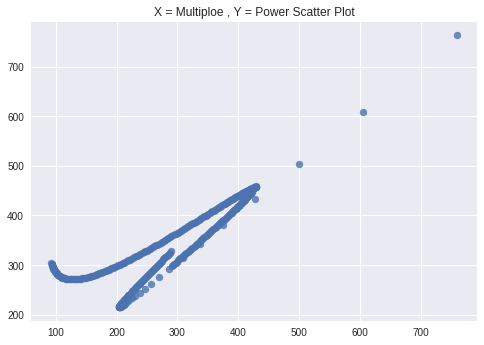

In [122]:

plt.scatter( data3.multiploe,  data3.power , label='GDP per capita' ,alpha =0.8) 
plt.title("X = Multiploe , Y = Power Scatter Plot")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


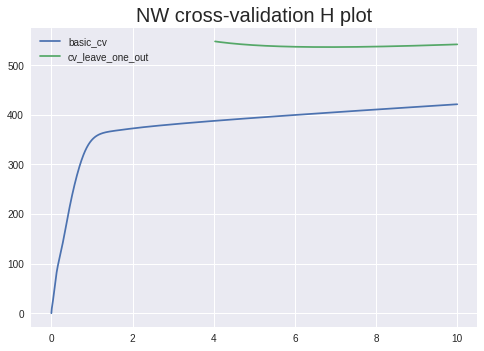

basci_cv  / optimal h = [1.e-07]  loss = 9.895471195092372e-29  
cv_leave_one_out / optimal h = [2.78278285]  loss = 536.5922038317434  
[30.2662261]


In [127]:
x = data3.multiploe.values
y = data3.power.values

    
method2 = "nw"
grid_h = np.linspace(0.0000001 , 10 , 1000)
save = []
save2 = []
for i in grid_h :
    save.append(CV(X= x , Y = y , h = i , method =method2))
    save2.append(BASIC_CV(X= x , Y = y , h = i , method =method2))
plt.plot( grid_h , save2 , label ="basic_cv")
plt.plot( grid_h , save , label ="cv_leave_one_out")
plt.title( "NW cross-validation H plot"  , fontsize = 20 )
plt.legend()
plt.show()


save2_index = np.where(save2  ==  np.min(save2))
print("basci_cv  / optimal h = {}  loss = {}  ".format( grid_h[save2_index] , np.min(save2)) )

save=np.asarray(save)
save = save[np.isfinite(save)]

save_index = np.where(save  ==  np.min(save))
print("cv_leave_one_out / optimal h = {}  loss = {}  ".format( grid_h[save_index] , np.min(save)) )
model = nparam.KernelReg(endog=[y],
                          exog=[x], 
                         var_type='c', bw='cv_ls')


model.fit()
print(model.bw)
model_bw = model.bw
## basci_cv h = 0.12012022
## cv_leave_One_out = 0.83083
## statmodels (least-squares cross-validation) : 5.4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


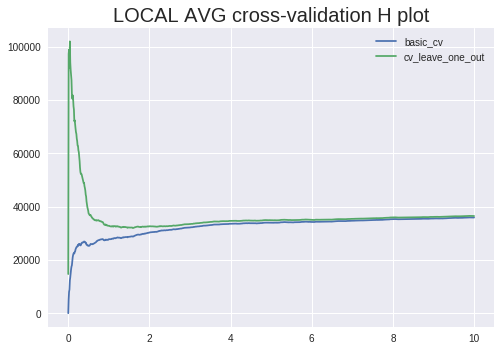

basci_cv  / optimal h = 1e-07  loss = 16.36280887444383  
cv_leave_one_out / optimal h = 1e-07  loss = 14710.165178125  
[30.26566598]


In [128]:
x = data.multiploe.values
y = data.power.values


method2 = "local_avg"
grid_h = np.linspace(0.0000001 , 10 , 1000)
save = []
save2 = []
for i in grid_h :
    save.append(CV(X= x , Y = y , h = i , method =method2))
    save2.append(BASIC_CV(X= x , Y = y , h = i , method =method2))
plt.plot( grid_h , save2 , label ="basic_cv")
plt.plot( grid_h , save , label ="cv_leave_one_out")
plt.title( "LOCAL AVG cross-validation H plot" , fontsize = 20 )
plt.legend()
plt.show()


save2_index = np.where(save2  ==  np.min(save2))[0]
print("basci_cv  / optimal h = {}  loss = {}  ".format( grid_h[save2_index][0] , np.min(save2)) )

save=np.asarray(save)
save = save[np.isfinite(save)]

save_index = np.where(save  ==  np.min(save))[0]
print("cv_leave_one_out / optimal h = {}  loss = {}  ".format( grid_h[save_index][0] , np.min(save)) )
model = nparam.KernelReg(endog=[y],
                          exog=[x], 
                         var_type='c', bw='cv_ls')


model.fit()
print(model.bw)
model_bw = model.bw



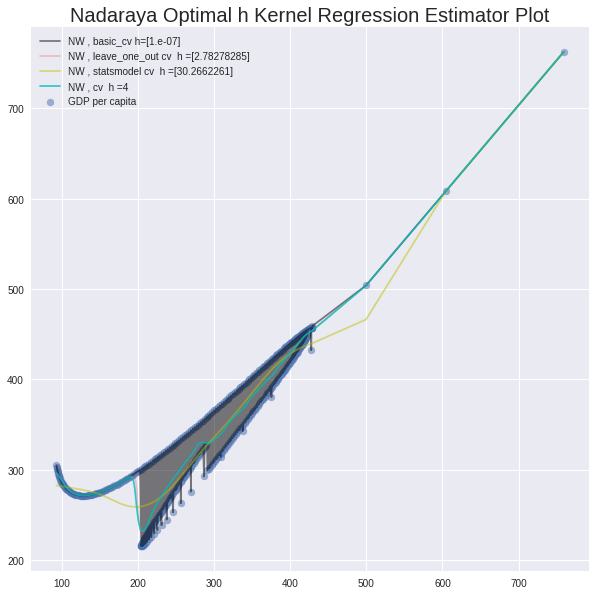

In [126]:
if __name__ == '__main__':
    import math
    
    x = data3.multiploe.values
    y = data3.power.values
    
    
    NW = NWE(X = x , Y = y , h = grid_h[save2_index] )
    NW1 = NWE(X = x , Y = y , h = grid_h[save_index] )
    NW2 = NWE(X = x , Y = y , h = model_bw )
    h1 = 4
    NW3 = NWE(X = x , Y = y , h = h1 )
    
    plt.figure(figsize=(10,10))
    plt.scatter(x, y, label='GDP per capita' , alpha = 0.5)
    plt.plot(NW.x , NW.nw ,"k-" ,label ="NW , basic_cv h={}".format(grid_h[save2_index]) , alpha = 0.5)
    plt.plot(NW1.x , NW1.nw ,"r-" ,label ="NW , leave_one_out cv  h ={}".format(grid_h[save_index]) , alpha = 0.2)
    plt.plot(NW2.x , NW2.nw ,"y-" ,label ="NW , statsmodel cv  h ={}".format(model_bw) , alpha = 0.5)
    plt.plot(NW3.x , NW3.nw ,"c-" ,label ="NW , cv  h ={}".format( h1 ) , alpha = 0.8)
    plt.title("Nadaraya Optimal h Kernel Regression Estimator Plot" , fontsize= 20 )
    plt.legend()
    plt.show()



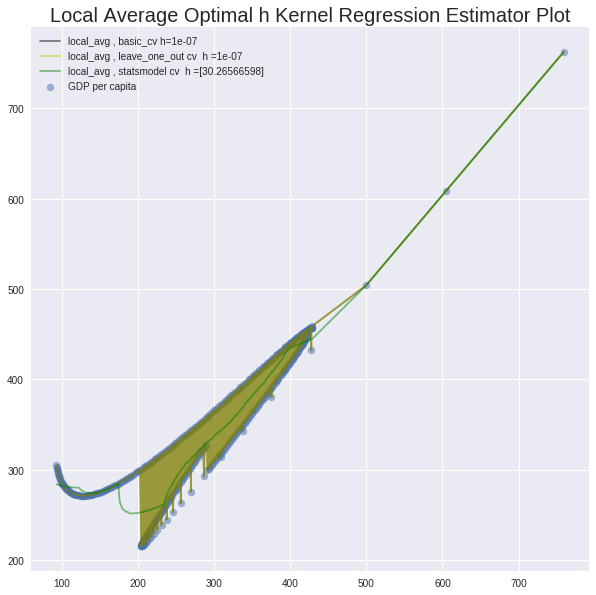

In [129]:
if __name__ == '__main__':
    import math
    
    x = data3.multiploe.values
    y = data3.power.values    
    
    local1 = loc_avg(X = x , Y = y , h = grid_h[save2_index][0] )
    local2 = loc_avg(X = x , Y = y , h = grid_h[save_index][0] )
    local3 = loc_avg(X = x , Y = y , h = model_bw )
    
    plt.figure(figsize=(10,10))
    plt.scatter(x, y, label='GDP per capita' , alpha = 0.5)
    plt.plot(local1.x , local1.local ,"k-" ,label ="local_avg , basic_cv h={}".format(grid_h[save2_index][0]) , alpha = 0.5)
    plt.plot(local2.x , local2.local ,"y-" ,label ="local_avg , leave_one_out cv  h ={}".format(grid_h[save_index][0]) , alpha = 0.5)
    plt.plot(local3.x , local3.local ,"g-" ,label ="local_avg , statsmodel cv  h ={}".format(model_bw) , alpha = 0.5)
    plt.title("Local Average Optimal h Kernel Regression Estimator Plot" , fontsize = 20 )
    plt.legend()
    plt.show()


# 3 
$$ Y_i = m(x_i) + \epsilon_i  \\
where m(x) = x^2 - 2x   \quad  x \in [0,2]  \quad and \quad \epsilon_i  \overset{iid}{\sim}   N(0 , 0.5^2) 
$$

* Simulate one sample {$ (x_i , Y_i  ) , i= 1 , ... , 100 $} \ 
 you can choose $ x_i = \frac{i}{50} $ \
 Fit a Nadaraya-waston estimator to this data
 
* Choose your kernel and h. Estimate MSE( $\hat{m(1)})$) by simulation \
Hint : simulate many samples from the model and use the sample counterpart as the estimator 

* Repeat step 2 for a different h , Compare the results and give your comments 
* Caculate the estimated value of mean integrated squared error (MISE) from 200 repeated samples 

* Extra $MSE = BIAS^2 + Variance $ so you find $ Bias^2  and Variance 200 repeated samples $ 

# 1번 , 3번

In [0]:
x = np.linspace( 0 , 2 , num = 100 )
eps = np.random.normal(loc = 0.0 , scale = 0.5 , size = 100)
m_x = x*x - 2 *x
y = m_x + eps

Text(0.5,1,'$y = x^2 - 2x + \\epsilon$')

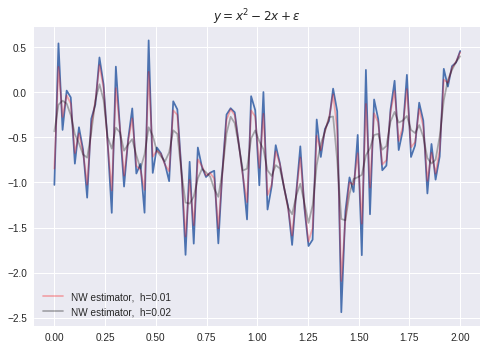

In [131]:
h_size = 0.01
h_size2 = 0.02
plt.plot( x , y )
NW = NWE(X = x , Y = y , h = h_size )
NW2 = NWE(X = x , Y = y , h = h_size2 )
plt.plot(NW.x , NW.nw ,"r-" ,label ="NW estimator,  h={}".format( h_size ) , alpha = 0.3)
plt.plot(NW2.x , NW2.nw ,"k-" ,label ="NW estimator,  h={}".format( h_size2 ) , alpha = 0.3)
plt.legend()
plt.title("$y = x^2 - 2x + \epsilon$")

## Comment 
* h 가 커질수록 완만하게 되는 것을 확인 할 수 있었습니다.

# $MSE(\hat{m}(1))  $ by simulation 샘플링 1000번

* Kernel = Gaussian
* h = 0.01

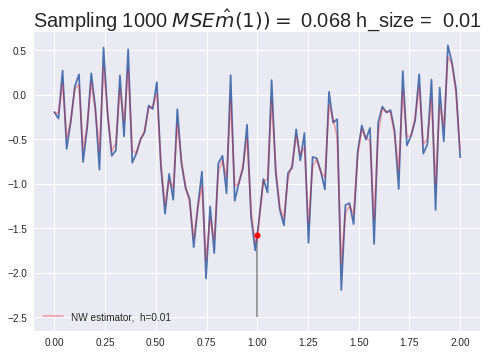

In [134]:
h_size = 0.01

blank = []
for i in range(1000) :
    x = np.linspace( 0 , 2 , num = 100 )
    x[50]=1
    eps = np.random.normal(loc = 0.0 , scale = 0.5 , size = 100)
    m_x = x*x - 2 *x
    y = m_x + eps
    NW = NWE(X = x , Y = y , h = h_size )
    output = np.square(y[50] - NW.nw.values[50])
    blank.append(output)


mse = np.mean(blank)

plt.plot( x , y )
NW = NWE(X = x , Y = y , h = h_size )
plt.plot(NW.x , NW.nw ,"r-" ,label ="NW estimator,  h={}".format( h_size ) , alpha = 0.3)
plt.vlines( x = 1 ,  ymin = -2.5 , ymax = y[50] , colors = "k" , alpha = 0.4)
plt.plot( [1] , y[50] , marker='o', markersize=6, color="red")
plt.legend()
plt.title("Sampling 1000 $MSE \hat{m}(1)) = $ %5.3f h_size = %5.2f" % (mse , h_size ) , fontsize= 20 )
plt.show()


In [135]:
h_size = 0.01

blank = []
blank2 = []
sampling = 200
for i in range( sampling ) :
    x = np.linspace( 0 , 2 , num = 100 )
    eps = np.random.normal(loc = 0.0 , scale = 0.5 , size = 100)
    m_x = x*x - 2 *x
    y = m_x + eps
    NW = NWE(X = x , Y = y , h = h_size )
    """
    ISE
    """
    output = np.sum( np.square(y - NW.nw.values) )
    blank.append(output)
    """
    MSE
    """
    output2 = np.mean( np.square(y - NW.nw.values) )
    blank2.append(output2)


"""MISE"""
mise = np.mean( blank )
print("Version 1 MISE = " , mise )

"""
합계를 할 때는 샘플링한 수만큼이 아닌 데이터 사이즈 만큼 해줘야 해서 
샘플링 200번 / 데이터 개수 100 개 이므로 2로 나눠줘야한다.
"""
mise2 = np.sum(blank2) / int(sampling / 100 )
print("Version 2 MISE = " , mise2)

Version 1 MISE =  1.579021994626695
Version 2 MISE =  1.5790219946266952


In [136]:
h_size = 0.01

var = []
bias = []
mse = []
sampling = 200
for i in range( sampling ) :
    x = np.linspace( 0 , 2 , num = 100 )
    eps = np.random.normal(loc = 0.0 , scale = 0.5 , size = 100)
    m_x = x*x - 2 *x
    y = m_x + eps
    NW = NWE(X = x , Y = y , h = h_size )
    """
    Bias , Var
    """
    VAR   = np.mean( np.square( NW.nw.values - np.mean( NW.nw.values ) ) )
    var.append(VAR)
    
   
    BIAS  = np.square( np.mean( NW.nw.values - y  )  )
    bias.append(BIAS)
    """
    MSE
    """
    output = np.mean( np.square( y - NW.nw.values) )
    mse.append(output)


    
bias = np.sum(bias) / int(sampling / 100 )
var = np.sum(var)  / int(sampling / 100 )
mise = var + bias

print("integrated var + integrated bias => MISE = " , mise )

    
"""
MISE
"""

mise2 = np.sum(mse) / int(sampling / 100 )
print("Version 2 MISE = " , mise2)


integrated var + integrated bias => MISE =  25.032570156576156
Version 2 MISE =  1.5738928317998468


$$ \int E[f(x) - \hat{f(x)}]^2_{dx}  = IMSE \\
E( \int  [f(x) - \hat{f(x)}]^2_{dx} = MISE  \\
\int MSE = \int Var + Bias^2_{dx} == \int E[(\hat{f(x)} - E[\hat{f(x)}])^2] + \int E[\hat{f(x)}-f(x)]^2  $$


어디서 실수인지 모르겠음

In [560]:
h_size = 0.01

blank = []
for i in range(1000) :
    x = np.linspace( 0 , 2 , num = 100 )
    x[50]=1
    eps = np.random.normal(loc = 0.0 , scale = 0.5 , size = 100)
    m_x = x*x - 2 *x
    y = m_x + eps
    NW = NWE(X = x , Y = y , h = h_size )
    """
    MSE
    """
    output = np.mean( np.square(y - NW.nw.values) )
    blank.append(output)


"""MISE"""
mise = np.sum(blank)
print("MISE = " , mise)

MISE =  17.039905675040757


In [132]:
d = np.arange(9).reshape(3,3)
print(d)
a = np.array([10, 20 ,30])

print(d * a)
h = np.sum( d*a , axis = 1)
print(h)
c = [2, 5, 5]

print(a/c)
np.sum( np.square(a/c - a ) )  / len(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[  0  20  60]
 [ 30  80 150]
 [ 60 140 240]]
[ 80 260 440]
[5. 4. 6.]


285.6666666666667